# Plot Time Series w/ Observations





## Libraries

In [1]:
####################################################
####################################################
####################################################
#
# Libraries
#

import numpy             as np
import datetime          as datetime
import os                as os
import platform          as platform
import xarray            as xr
import pandas            as pd
import glob              as glob
import siphon.catalog    as siphcat  
import siphon.ncss       as siphncss
import seaborn           as sns
import matplotlib.pyplot as plt
import pint_xarray       as px
import matplotlib.dates  as mdates
import timezonefinder    as tzf

import metpy.calc  as mpcalc
import metpy.units as mpunits

from metpy.units import units

import pytz as pytz
import haversine as hs

sns.set_theme(style="ticks")

#
####################################################
####################################################
####################################################

## File Organization

In [2]:
####################################################
####################################################
####################################################
#
# File Organization
#

beta_on     = 1
max_domains = 3

if (platform.system() == "Darwin"):
    if (beta_on == 1):
        WRF_OVERALL_DIR = "/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/"
    else:
        WRF_OVERALL_DIR = "/Volumes/nfsdrives/ias_raid/projects/SD_Mines_WRF_REALTIME/"
else:
    WRF_OVERALL_DIR = "/projects/SD_Mines_WRF_REALTIME/"

os.chdir(WRF_OVERALL_DIR)

print( "Current Working Directory is now " + os.getcwd() )
    
WPS_WORK = WRF_OVERALL_DIR + "./WPS_PrepArea/"
WPS_EXE  = WRF_OVERALL_DIR + "./WRF4/WPS/"
WRF_EXE  = WRF_OVERALL_DIR + "./WRF4/WRF/test/em_real/"

TS_DIR = WRF_EXE

station_list_file = WRF_OVERALL_DIR + "namelist_files_and_local_scripts/time_series_station_files_"+str(max_domains)+"_dom.xlsx"

os.chdir(WRF_EXE)

#
####################################################
####################################################
####################################################

Current Working Directory is now /Users/wjc/GitHub/SD_Mines_WRF_REALTIME


## Time Control

In [3]:
####################################################
####################################################
####################################################
#
# Model Start Date
#

with open(WRF_OVERALL_DIR + "./current_run.txt") as f:
    model_start_date_YYYYMMDDHH = f.readlines()

model_start_date_YYYYMMDDHH = model_start_date_YYYYMMDDHH[0][0:10]+"0000"
    
model_start_datetime = datetime.datetime.strptime(model_start_date_YYYYMMDDHH, '%Y%m%d%H%M%S')
model_end_datetime   = model_start_datetime + datetime.timedelta(hours=36)
current_datetime     = datetime.datetime.utcnow()
siphon_end_datetime  = min(current_datetime,model_end_datetime)

print("         Model Start Datetime is ", model_start_datetime)
print("           Model End Datetime is ",   model_end_datetime)
print("             Current Datetime is ",     current_datetime)
print("          Siphon End Datetime is ",  siphon_end_datetime)

#
####################################################
####################################################
####################################################

         Model Start Datetime is  2021-09-28 18:00:00
           Model End Datetime is  2021-09-30 06:00:00
             Current Datetime is  2021-10-04 16:20:03.657013
          Siphon End Datetime is  2021-09-30 06:00:00


## Read tslist excel file



In [4]:
####################################################
####################################################
####################################################
#
# Read TSLIST Excel File
#

print("read file from "+station_list_file)

available_time_series_list = pd.read_excel(station_list_file,
                                           index_col=0)

print(available_time_series_list)

#
####################################################
####################################################
####################################################

read file from /Users/wjc/GitHub/SD_Mines_WRF_REALTIME/namelist_files_and_local_scripts/time_series_station_files_3_dom.xlsx
   Station ID  Domain           Station Name  Latitude  Longitude
3        KAIA       1       ALLIANCE ARPT NE   42.0500   -102.800
4        KBFF       1    SCOTTSBLUFF ARPT NE   41.8710   -103.593
24       KTOR       1     TORRINGTON ARPT WY   42.0610   -104.158
30       MUNS       1       MUNICH SCHOOL ND   48.6667    -98.835
0        K2WX       2             BUFFALO SD   45.6040   -103.546
1        K4DG       2             DOUGLAS WY   42.7500   -105.383
6        KCDR       2     CHADRON AIRPORT NE   42.8370   -103.098
8        KD07       2       FAITH AIRPORT SD   45.0320   -102.019
9        KDGW       2    CONVERSE CO ARPT WY   42.7960   -105.380
11       KGCC       2      GILLETTE  ARPT WY   44.3390   -105.542
12       KGRN       2         GORDON MUNI NE   42.8060   -102.175
13       KHEI       2      HETTINGER ARPT ND   46.0140   -102.655
14       KHEI    

## Rotate through Available Files

 
 
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/./WRF4/WRF/test/em_real/./wrfout_d01_2021-09-28_18_KAIA.nc
 


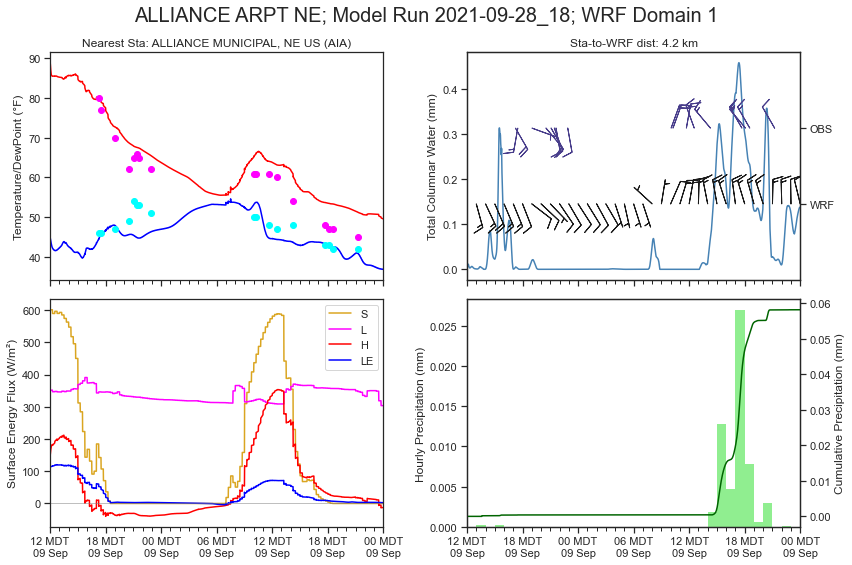

 
 
 
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/./WRF4/WRF/test/em_real/./wrfout_d01_2021-09-28_18_KBFF.nc
 


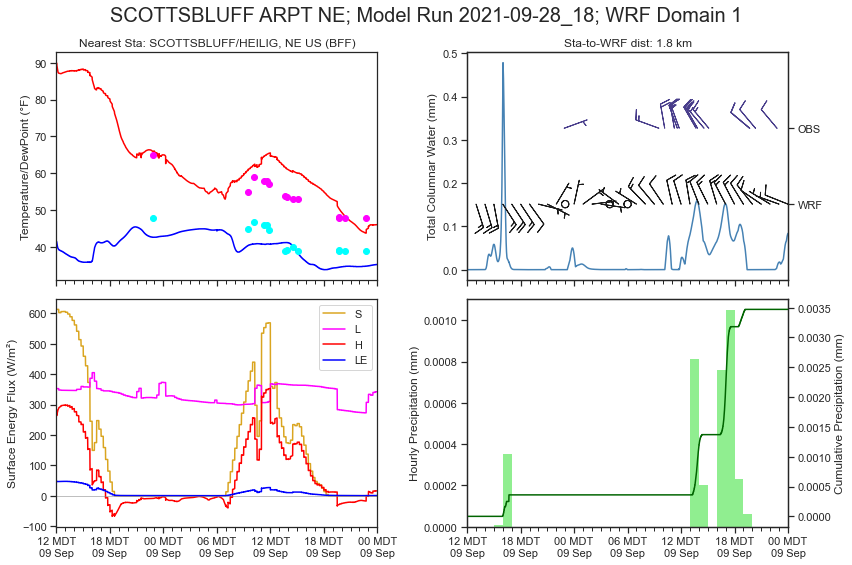

 
 
 
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/./WRF4/WRF/test/em_real/./wrfout_d01_2021-09-28_18_KTOR.nc
 


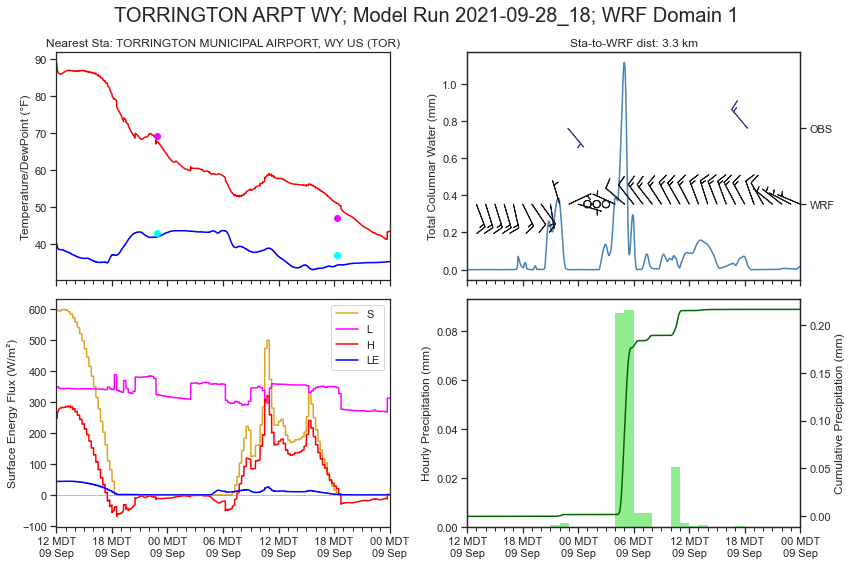

 
 
 
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/./WRF4/WRF/test/em_real/./wrfout_d01_2021-09-28_18_MUNS.nc
 


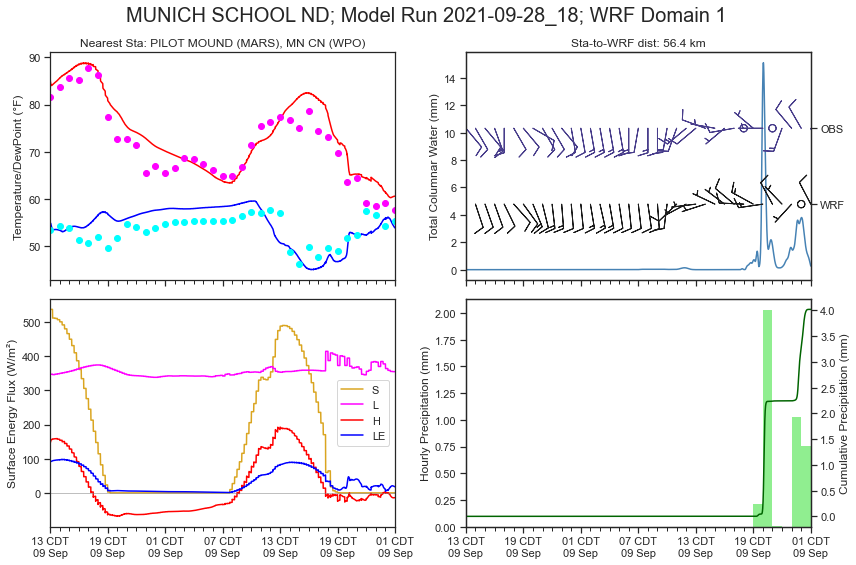

 
 
 
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/./WRF4/WRF/test/em_real/./wrfout_d02_2021-09-28_18_K2WX.nc
 


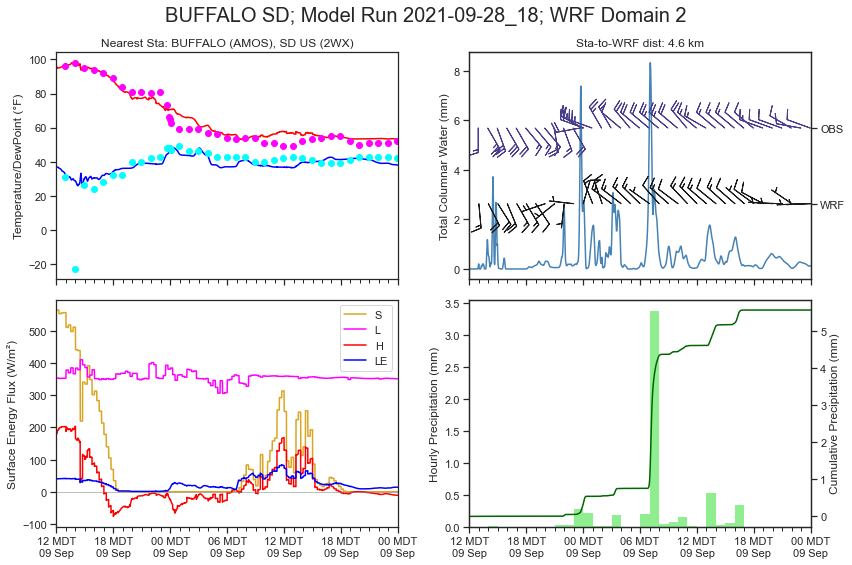

 
 
 
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/./WRF4/WRF/test/em_real/./wrfout_d02_2021-09-28_18_K4DG.nc
 


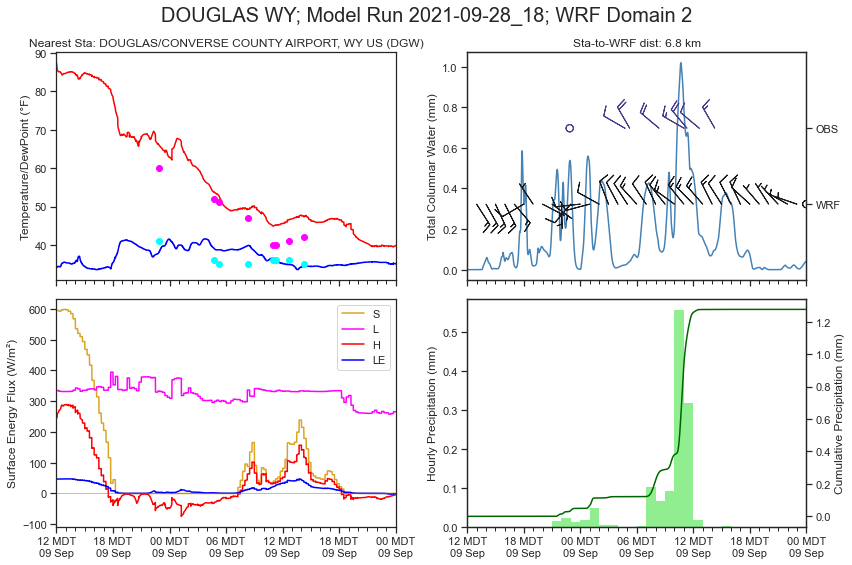

 
 
 
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/./WRF4/WRF/test/em_real/./wrfout_d02_2021-09-28_18_KCDR.nc
 


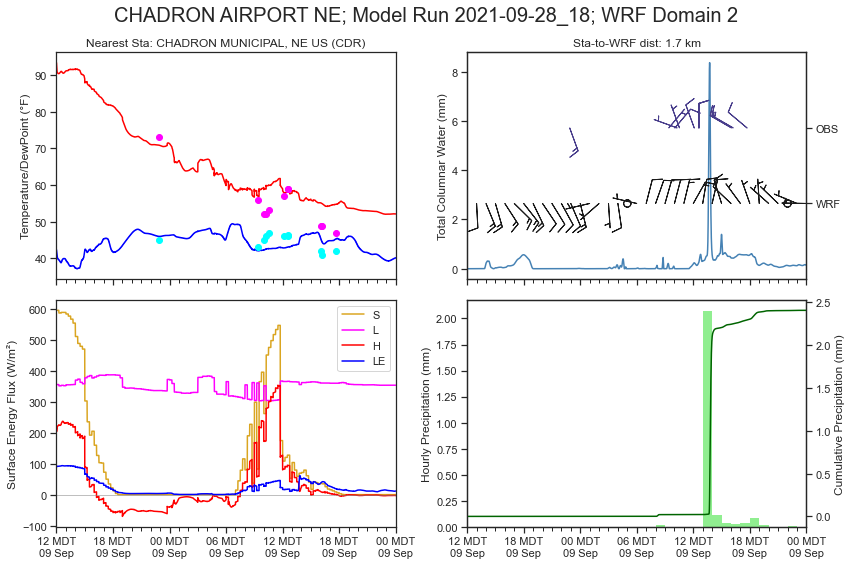

 
 
 
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/./WRF4/WRF/test/em_real/./wrfout_d02_2021-09-28_18_KD07.nc
 


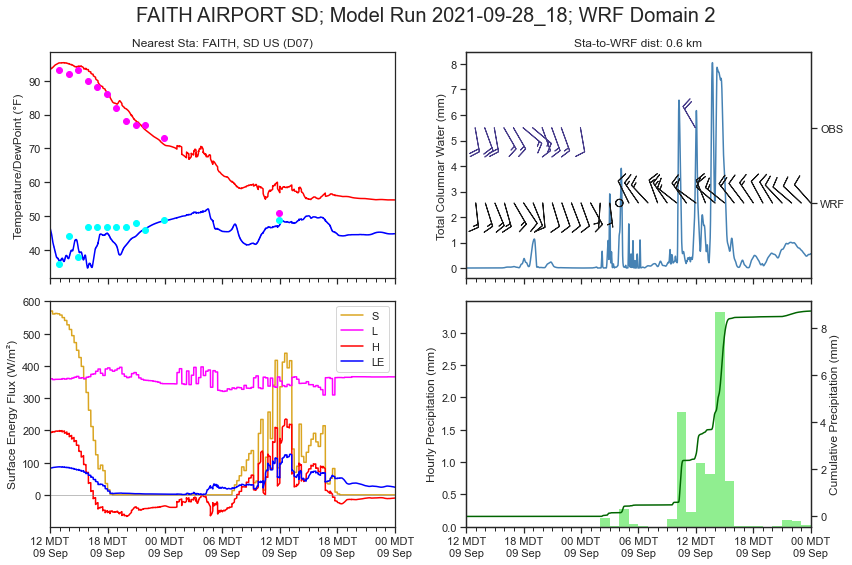

 
 
 
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/./WRF4/WRF/test/em_real/./wrfout_d02_2021-09-28_18_KDGW.nc
 


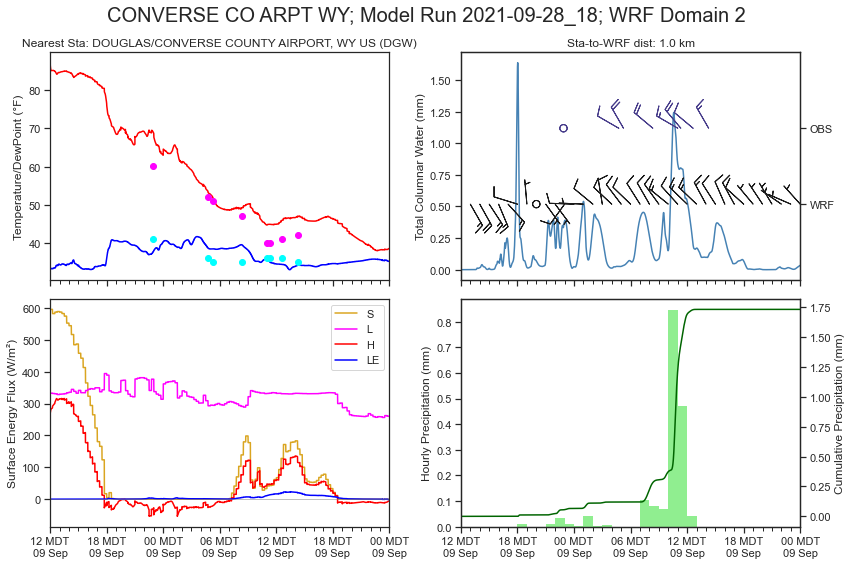

 
 
 
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/./WRF4/WRF/test/em_real/./wrfout_d02_2021-09-28_18_KGCC.nc
 


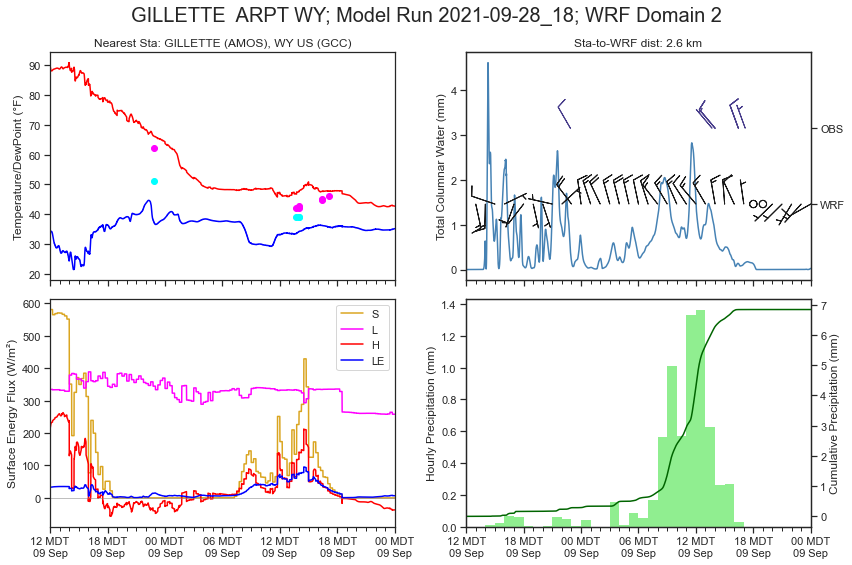

 
 
 
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/./WRF4/WRF/test/em_real/./wrfout_d02_2021-09-28_18_KGRN.nc
 


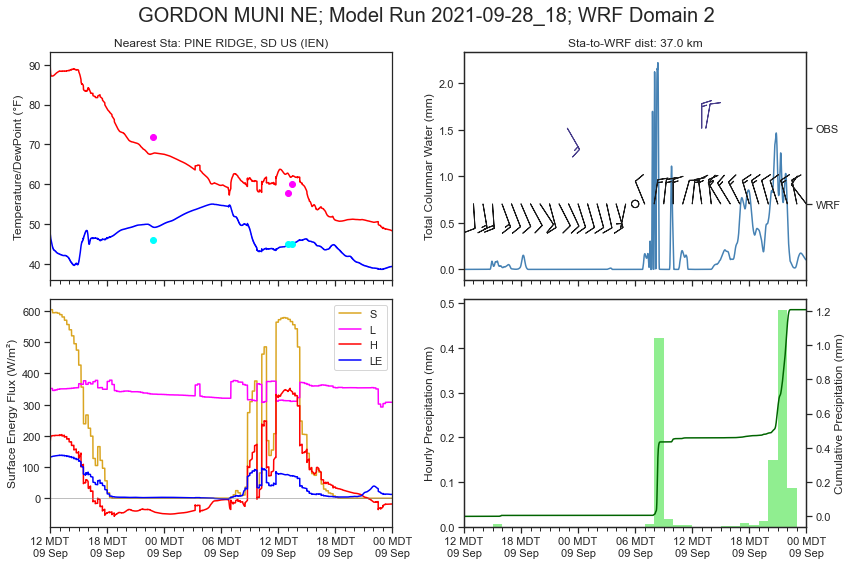

 
 
 
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/./WRF4/WRF/test/em_real/./wrfout_d02_2021-09-28_18_KHEI.nc
 


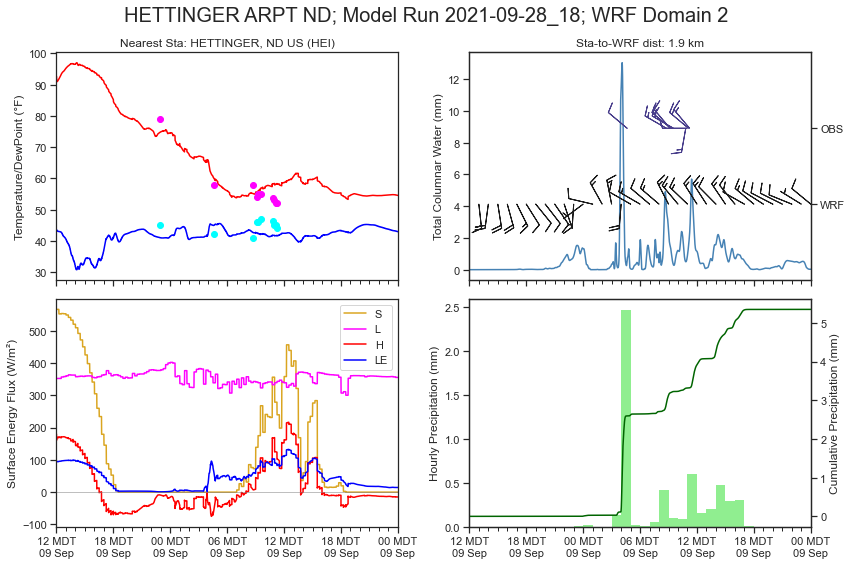

 
 
 
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/./WRF4/WRF/test/em_real/./wrfout_d02_2021-09-28_18_KHEI.nc
 


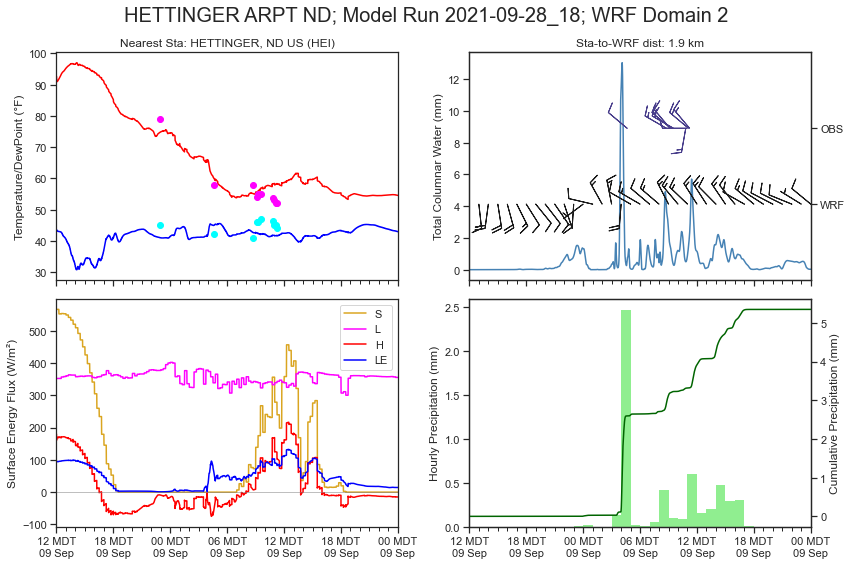

 
 
 
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/./WRF4/WRF/test/em_real/./wrfout_d02_2021-09-28_18_KIEN.nc
 


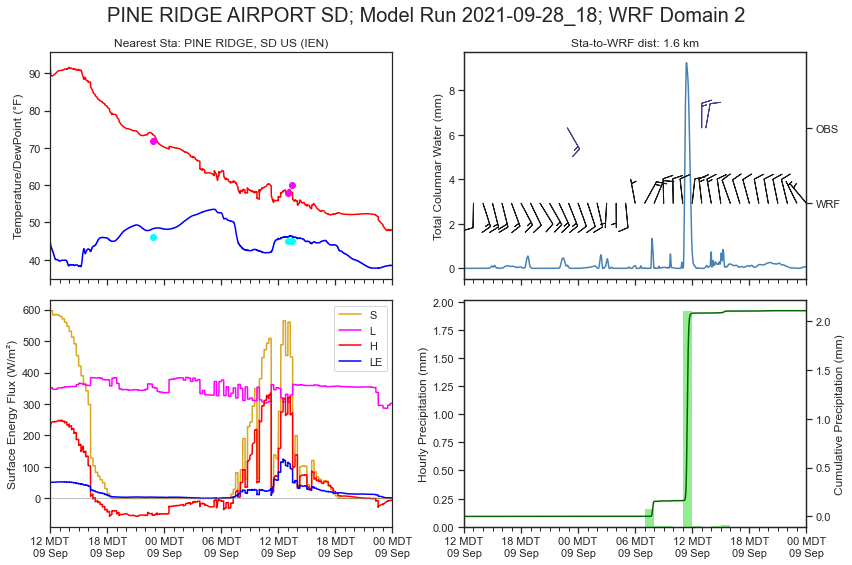

 
 
 
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/./WRF4/WRF/test/em_real/./wrfout_d02_2021-09-28_18_KMIS.nc
 


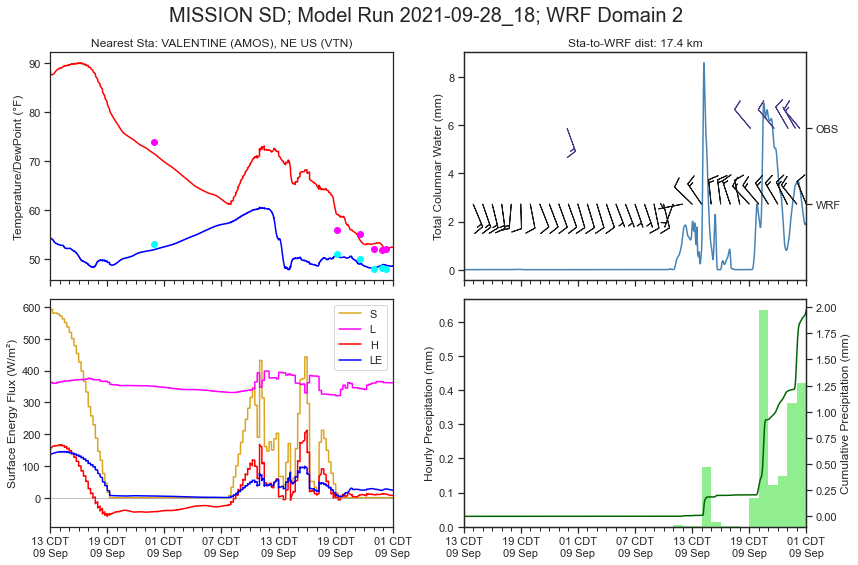

 
 
 
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/./WRF4/WRF/test/em_real/./wrfout_d02_2021-09-28_18_KPHP.nc
 


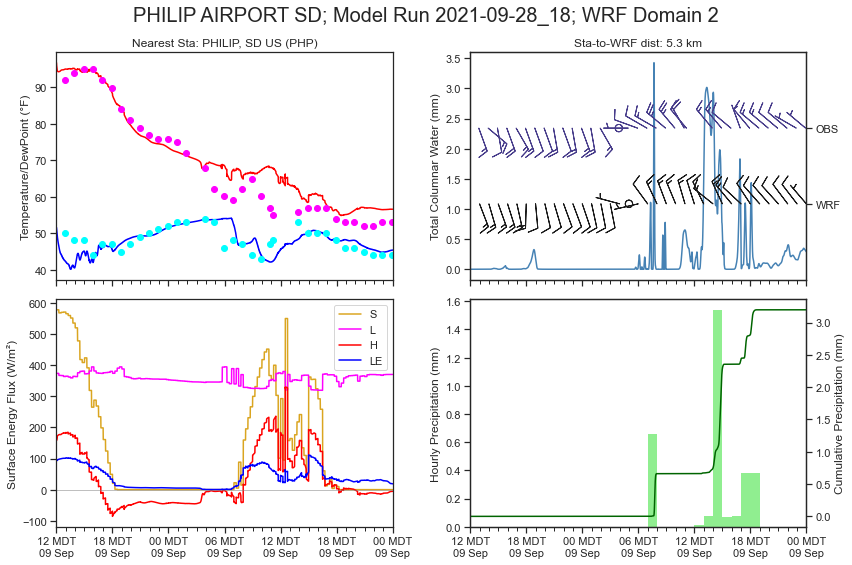

 
 
 
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/./WRF4/WRF/test/em_real/./wrfout_d02_2021-09-28_18_KPIR.nc
 


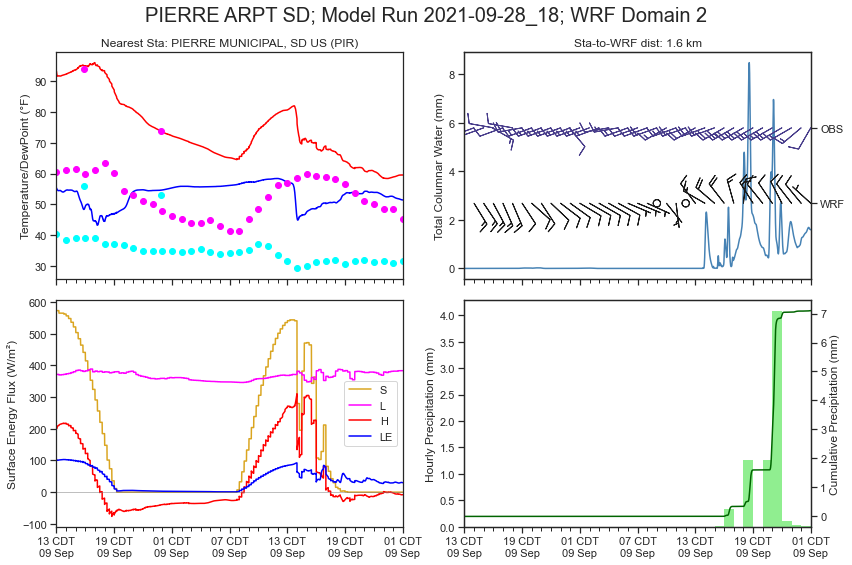

 
 
 
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/./WRF4/WRF/test/em_real/./wrfout_d02_2021-09-28_18_KVTN.nc
 


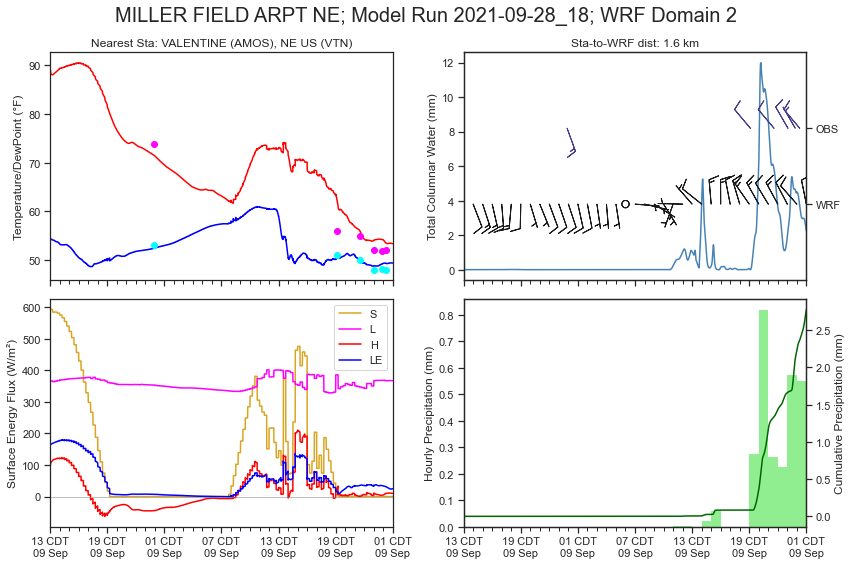

 
 
 
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/./WRF4/WRF/test/em_real/./wrfout_d03_2021-09-28_18_KCUT.nc
 


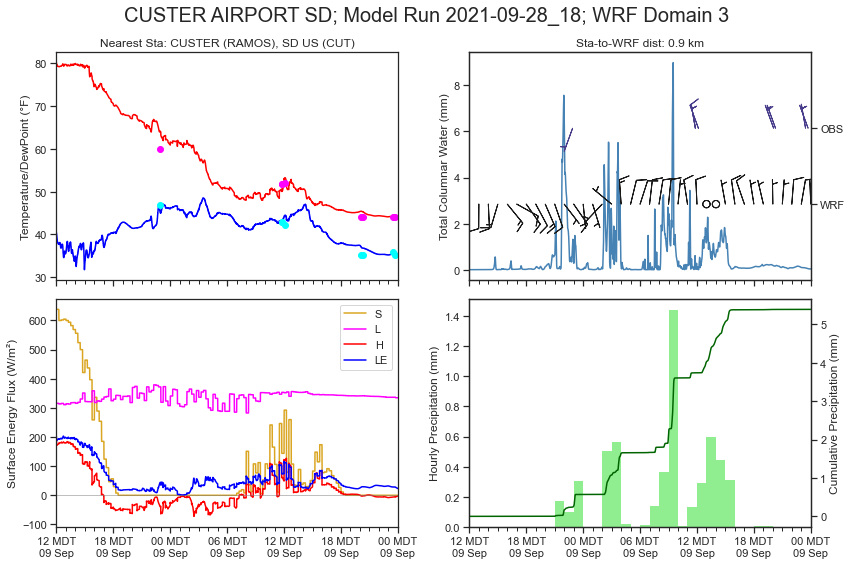

 
 
 
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/./WRF4/WRF/test/em_real/./wrfout_d03_2021-09-28_18_KRAP.nc
 


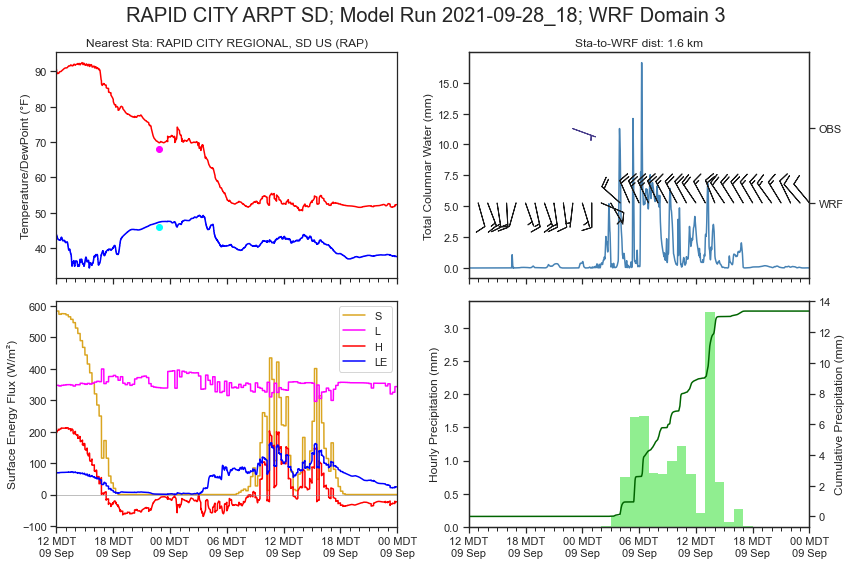

 
 
 
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/./WRF4/WRF/test/em_real/./wrfout_d03_2021-09-28_18_KRCA.nc
 


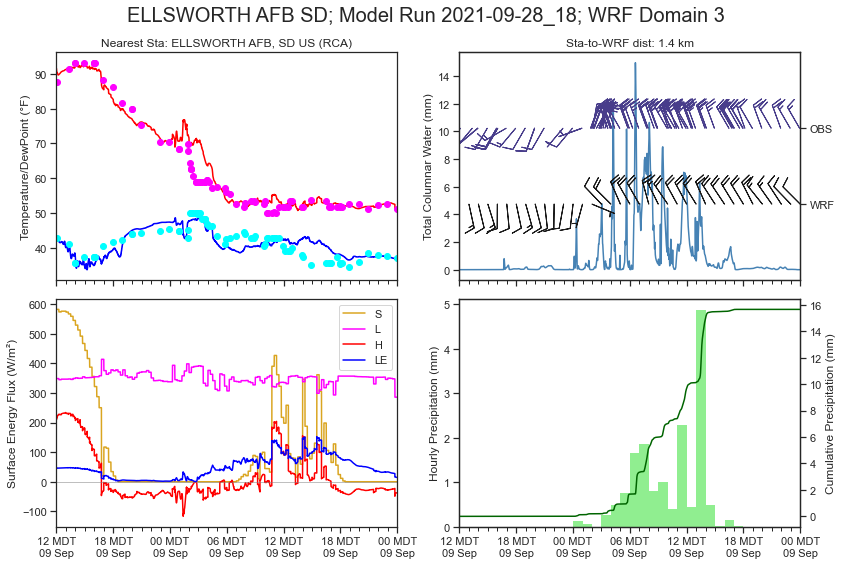

 
 
 
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/./WRF4/WRF/test/em_real/./wrfout_d03_2021-09-28_18_KSPF.nc
 


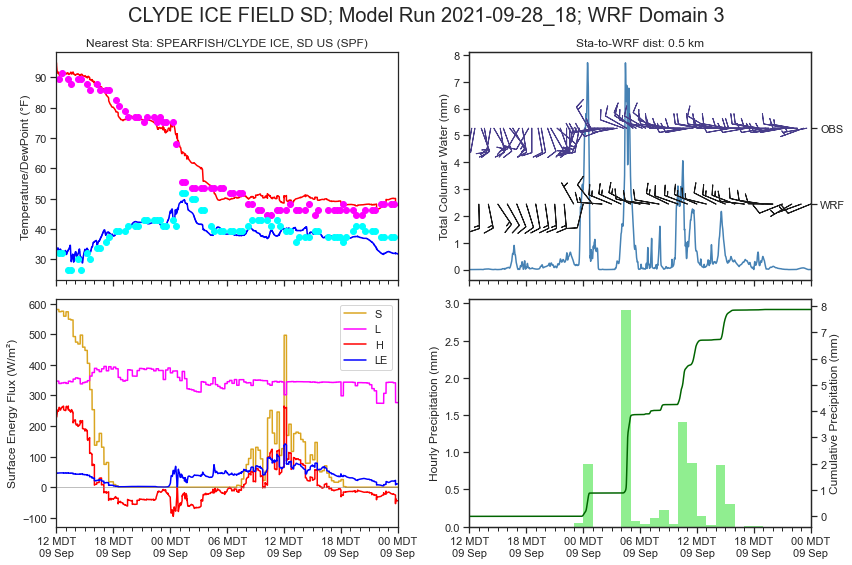

 
 
 
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/./WRF4/WRF/test/em_real/./wrfout_d03_2021-09-28_18_KUDX.nc
 


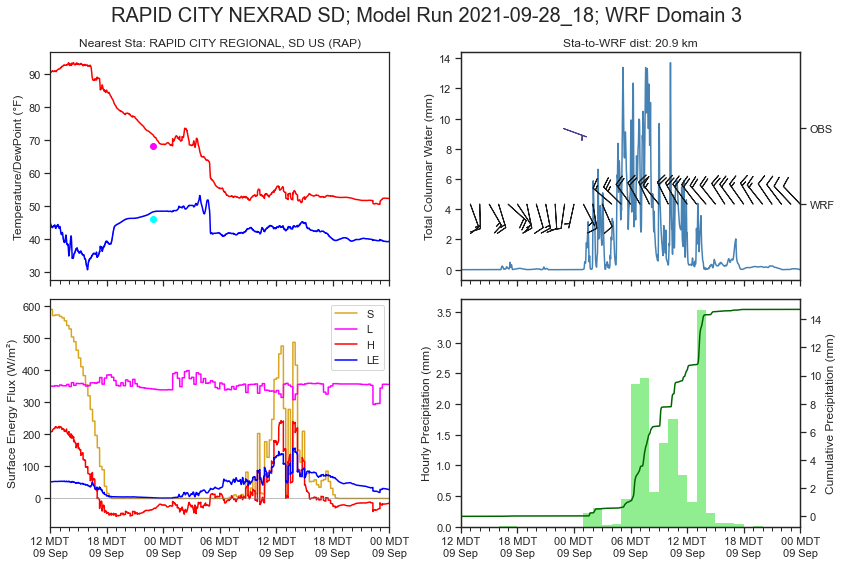

 
 
 
/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/./WRF4/WRF/test/em_real/./wrfout_d03_2021-09-28_18_KUNR.nc
 


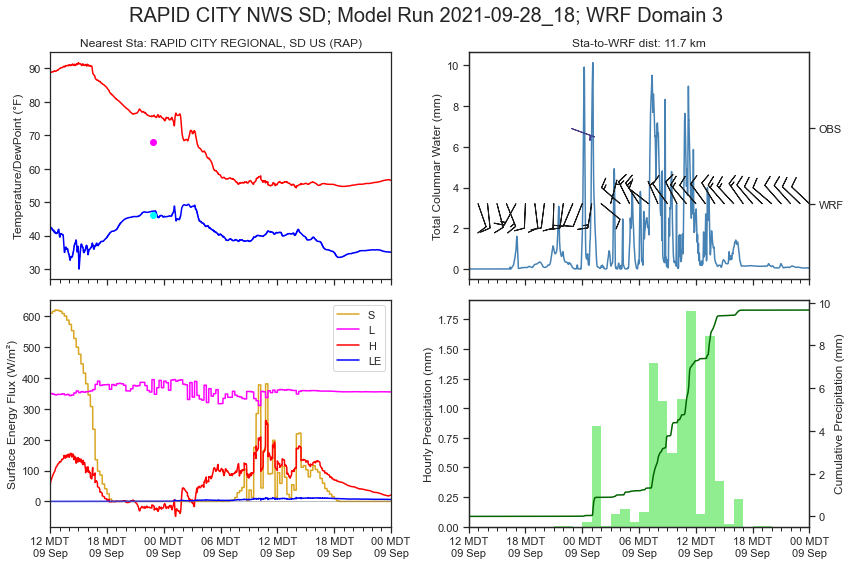

In [5]:
####################################################
####################################################
####################################################
#
# Rotate through Available Files
#

file_time = model_start_datetime.strftime('%Y-%m-%d_%H')

for station in available_time_series_list.iterrows():

    ###################################################################
    #
    # Pull Station Data 
    #

    print(" ")
    station_id     = station[1][0]
    grid_domain    = station[1][1]
    station_name   = station[1][2]
    station_lat    = station[1][3]
    station_lon    = station[1][4]

    #    
    ###################################################################

    ###################################################################
    #
    # Pull WRF Time Series
    #
    
    netcdf_file_name = TS_DIR + "./wrfout_d"+str(grid_domain).zfill(2)+"_"+file_time+"_"+station_id+".nc"
    
    wrf_timeseries = xr.open_dataset(netcdf_file_name, 
                                 engine='netcdf4')
    
    print(" ")
    print(netcdf_file_name)
    print(" ")

 
    #
    ###################################################################

    ###################################################################
    #
    # Pull NCSS Realtime Obs
    #

    #
    # Source Data Server
    #

    metar_cat_url = 'http://thredds.ucar.edu/thredds/catalog/nws/metar/ncdecoded/catalog.xml?dataset=nws/metar/ncdecoded/Metar_Station_Data_fc.cdmr'

    metar_cat = siphcat.TDSCatalog(metar_cat_url)

    dataset = list(siphcat.TDSCatalog(metar_cat_url).datasets.values())[0]

    ncss_url = dataset.access_urls["NetcdfSubset"]

    ncss = siphncss.NCSS(ncss_url)

    #
    # çonstruct query
    #

    query = ncss.query()
    query.lonlat_point(wrf_timeseries["wrf_grid_longitude"].values, 
                       wrf_timeseries["wrf_grid_latitude"].values)

    query.time_range(model_start_datetime, siphon_end_datetime)

    query.variables('air_pressure_at_sea_level',
                    'air_temperature',
                    'cloud_area_fraction',
                    'dew_point_temperature',
                    'hectoPascal_ALTIM',
                    'high_cloud_area_fraction',
                    'high_cloud_base_altitude',
                    'low_cloud_area_fraction',
                    'low_cloud_base_altitude',
                    'middle_cloud_area_fraction',
                    'middle_cloud_base_altitude',
                    'numChildren',
                    'precipitation_amount_24',
                    'precipitation_amount_hourly',
                    'report',
                    'report_id',
                    'report_length',
                    'snowfall_amount',
                    'snowfall_amount_last_hour',
                    'visibility_in_air',
                    'visibility_in_air_direction',
                    'visibility_in_air_surface',
                    'visibility_in_air_vertical',
                    'weather',
                    'wind_from_direction',
                    'wind_from_direction_max',
                    'wind_from_direction_min',
                    'wind_gust',
                    'wind_peak_from_direction',
                    'wind_peak_speed',
                    'wind_peak_time',
                    'wind_speed')
    query.accept('netcdf')

    #
    # Pull Querry
    # 

    ncss_xarray_dataset = xr.open_dataset(xr.backends.NetCDF4DataStore(ncss.get_data(query)))
    ncss_xarray_dataset = ncss_xarray_dataset.sortby(["time"])
    
    metar_station_name = ncss_xarray_dataset["station_description"].values
    metar_station_ata  = ncss_xarray_dataset["station_id"].values
    
    metar_latitude  = ncss_xarray_dataset["latitude"].values
    metar_longitude = ncss_xarray_dataset["longitude"].values
    
    metar_to_sta_distance  = hs.haversine((metar_latitude,
                                           metar_longitude),
                                          (station_lat,
                                           station_lon))
    
    metar_to_wrf_distance = hs.haversine((metar_latitude,
                                          metar_longitude),
                                         (wrf_timeseries["wrf_grid_latitude"].values,
                                          wrf_timeseries["wrf_grid_longitude"].values))
    

    sta_to_wrf_distance   = hs.haversine((station_lat,
                                          station_lon),
                                         (wrf_timeseries["wrf_grid_latitude"].values,
                                          wrf_timeseries["wrf_grid_longitude"].values))

    #
    ###################################################################    
    

    ###################################################################
    ###################################################################
    #
    # Create Meteogram
    #

    ###################################################################
    #
    # Time Axes
    #
                                         
    tf     = tzf.TimezoneFinder()
    tz     = tf.certain_timezone_at(lng=station_lon, lat=station_lat)
    
    tzabbr = pytz.timezone(tz).localize(model_start_datetime)

    wrf_times  = pd.to_datetime(wrf_timeseries["time"]).tz_localize(tz="UTC").tz_convert(tz=tz)
    ncss_times = pd.to_datetime(ncss_xarray_dataset["time"]).tz_localize(tz="UTC").tz_convert(tz=tz)


    wrf_time_seconds =  wrf_times.minute*60+wrf_times.second 
    on_the_hour      = np.where(wrf_time_seconds ==0)
    wrf_time_hrly    = wrf_times[on_the_hour]
    wrf_time_hrly_bar = wrf_times[on_the_hour]-datetime.timedelta(minutes=30)

    #
    ###################################################################


    ###################################################################
    #
    # Precip Prep
    #

    wrf_cum_prec      = wrf_timeseries["stratiform_precipitation_amount"].values + wrf_timeseries["convective_precipitation_amount"].values
    wrf_cum_hrly_prec = wrf_cum_prec[on_the_hour]
    wrf_hrly_prec     = wrf_cum_hrly_prec.copy()

    wrf_hrly_prec[1:] = wrf_cum_hrly_prec[1:] - wrf_cum_hrly_prec[0:-1]

    #
    ###################################################################

    ###################################################################
    #
    # Wind Barb Prep
    #

    u_wrf = (wrf_timeseries["eastward_wind_10m"]*units("m")/units("s")).pint.to("knots")[on_the_hour]
    v_wrf = (wrf_timeseries["northward_wind_10m"]*units("m")/units("s")).pint.to("knots")[on_the_hour]

    obs_winddir   = ncss_xarray_dataset["wind_from_direction"] * units.deg
    obs_windspeed = ( ncss_xarray_dataset["wind_speed"] * units("m")/units("s")).pint.to("knots") 

    u_obs, v_obs =  mpcalc.wind_components(obs_windspeed, obs_winddir) 

    #
    ###################################################################

    ###################################################################
    #
    # Plot Meteogram
    #

    fig, ax = plt.subplots(figsize = (12, 8),
                           nrows   =  2, 
                           ncols   =  2,
                           sharex  =  True)

    date_form = mdates.DateFormatter("%H %Z\n%m %b", tz=pytz.timezone(tz))
    xmajor = mdates.HourLocator(interval = 6)
    xminor = mdates.HourLocator(interval = 1)

    #
    # Temperature and Humidity
    #
    
    ax[0,0].plot(wrf_times,
             (wrf_timeseries["air_temperature_2m"]*units("K")).pint.to("degF"),
              color = "red")
    ax[0,0].plot(wrf_times,
             (wrf_timeseries["dew_point_temperature_2m"]*units("K")).pint.to("degF"),
              color = "blue")

    ax[0,0].plot(ncss_times,
             (ncss_xarray_dataset["air_temperature"]*units("degC")).pint.to("degF"),
             marker = "o",
             color="magenta",
            linestyle = "None")
    ax[0,0].plot(ncss_times,
             (ncss_xarray_dataset["dew_point_temperature"]*units("degC")).pint.to("degF"),
             marker = "o",
             color="cyan",
            linestyle = "None")
    ax[0,0].set_ylabel("Temperature/DewPoint (°F)")
    ax[0,0].set_title("Nearest Sta: "+metar_station_name[0].astype('U') +" ("+metar_station_ata[0].astype('U') +")")
    ax[0,1].set_title("Sta-to-WRF dist: "+str(round(metar_to_wrf_distance,1)) +" km")


    #
    # Total Atmos Column Water + Wind Speed
    #
    
    ax[0,1].plot(wrf_times,
            wrf_timeseries["atmosphere_mass_content_of_water"],
              color = "steelblue")
    ax[0,1].set_ylabel("Total Columnar Water (mm)")
 

    ax01 = ax[0,1].twinx()
    
    ax01.set_ylim(0,1)
    ax01.set_yticks([1/3.,2/3.])
    ax01.set_yticklabels(["WRF","OBS"])

    ax01.barbs( wrf_time_hrly, 1/3.,  u_wrf, v_wrf )
    ax01.barbs( ncss_times,    2/3.,  u_obs, v_obs, color="darkslateblue")

   
    
    #
    # Surface Energy Budget
    #

    ax[1,0].plot(wrf_times,
                 wrf_timeseries["surface_net_downward_shortwave_flux"],
                 color = "goldenrod")
    ax[1,0].plot(wrf_times,
                 wrf_timeseries["surface_net_downward_longwave_flux"],
                 color = "magenta")
    ax[1,0].plot(wrf_times,
                 wrf_timeseries["surface_upward_sensible_heat_flux"],
                 color = "red")
    ax[1,0].plot(wrf_times,
                 wrf_timeseries["surface_upward_latent_heat_flux"],
                 color = "blue")
    ax[1,0].legend(["S","L","H","LE"])
    ax[1,0].set_ylabel("Surface Energy Flux (W/m²)")

    ax[1,0].axhline(y=0,color="grey", linewidth=0.5)
 
    #
    # Precipitation
    #

    ax[1,1].bar(wrf_time_hrly_bar,
                wrf_hrly_prec,
                linewidth=0,
                width=1/24, 
                color="lightgreen",
                edgecolor=None)
    ax11 = ax[1,1].twinx()
    ax11.plot(wrf_times,
              wrf_cum_prec, 
              color="darkgreen")
    ax11.set_ylabel("Cumulative Precipitation (mm)")
    ax[1,1].set_ylabel("Hourly Precipitation (mm)")

    fig.suptitle(station_name+"; Model Run "+file_time+"; WRF Domain "+str(grid_domain),
                 fontsize=20)


    ax[1,0].set_xlim(model_start_datetime, siphon_end_datetime)
    ax[1,0].xaxis.set_major_formatter(date_form)
    ax[1,0].xaxis.set_major_locator(xmajor)
    ax[1,0].xaxis.set_minor_locator(xminor)
    ax[1,0].xaxis_date()

    ax[1,1].set_xlim(model_start_datetime, siphon_end_datetime)
    ax[1,1].xaxis.set_major_formatter(date_form)
    ax[1,1].xaxis.set_major_locator(xmajor)
    ax[1,1].xaxis.set_minor_locator(xminor)
    ax[1,1].xaxis_date()



    plt.tight_layout()
    plt.subplots_adjust(top=0.90)


    plt.show()
    
    fig.savefig("./wrfout_dxx_"+file_time+"_"+station_id+".png")


    #
    ###################################################################

    #
    ###################################################################
    ###################################################################
    
    print(" ")



## Depart 

In [6]:
####################################################
####################################################
####################################################
#
# End of Script
#

print("Ploting Meteogram Script complete.")

#
####################################################
####################################################
####################################################

Ploting Meteogram Script complete.
